<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-обзор-данных" data-toc-modified-id="Загрузка-и-обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Корректность-проведения-теста" data-toc-modified-id="Корректность-проведения-теста-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Корректность проведения теста</a></span><ul class="toc-item"><li><span><a href="#Соответствие-данных-требованиям-ТЗ" data-toc-modified-id="Соответствие-данных-требованиям-ТЗ-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Соответствие данных требованиям ТЗ</a></span></li><li><span><a href="#Время-проведения-теста" data-toc-modified-id="Время-проведения-теста-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Время проведения теста</a></span></li><li><span><a href="#Аудитория" data-toc-modified-id="Аудитория-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Аудитория</a></span></li><li><span><a href="#Проверка-пункта-ТЗ-про-конверсию" data-toc-modified-id="Проверка-пункта-ТЗ-про-конверсию-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Проверка пункта ТЗ про конверсию</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Количество-событий" data-toc-modified-id="Количество-событий-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Количество событий</a></span></li><li><span><a href="#Распределение-событий-по-дням" data-toc-modified-id="Распределение-событий-по-дням-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Распределение событий по дням</a></span></li><li><span><a href="#Конверсия-в-воронке-событий" data-toc-modified-id="Конверсия-в-воронке-событий-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Конверсия в воронке событий</a></span></li><li><span><a href="#Особенности-данных" data-toc-modified-id="Особенности-данных-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Особенности данных</a></span></li></ul></li><li><span><a href="#Оценка-результатов-A/B-тестирования" data-toc-modified-id="Оценка-результатов-A/B-тестирования-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Оценка результатов A/B-тестирования</a></span><ul class="toc-item"><li><span><a href="#Результаты-А/B-теста" data-toc-modified-id="Результаты-А/B-теста-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Результаты А/B теста</a></span><ul class="toc-item"><li><span><a href="#Кумулятивные-графики" data-toc-modified-id="Кумулятивные-графики-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Кумулятивные графики</a></span></li></ul></li><li><span><a href="#Проверка-статистической-разницы" data-toc-modified-id="Проверка-статистической-разницы-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Проверка статистической разницы</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# A/B-тестирование

**Шаги исследования**

- *Загрузка и обзор данных*
- *Предобработка данных*
- *Корректность проведения теста*
- *Исследовательский анализ данных*
- *Оценка результатов A/B-тестирования*
- *Выводы*

**Цель исследования**

Провести оценку результатов A/B-теста

## Загрузка и обзор данных

In [82]:
# импортируем библиотеки необходимые для работы
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import datetime, timedelta
import math as mth
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from scipy import stats as st
import scipy.stats as stats

In [83]:
# выгрузка данных из файлов, вывод на экран информации о датафреймах и первых 5 строках

final_ab_events = pd.read_csv('final_ab_events.csv')
ab_project_marketing_events = pd.read_csv('ab_project_marketing_events.csv') 
final_ab_new_users = pd.read_csv('final_ab_new_users.csv') 
final_ab_participants = pd.read_csv('final_ab_participants.csv') 

    
for df in [ab_project_marketing_events, final_ab_new_users, final_ab_events, final_ab_participants]:
    display(df.head())
    print(df.info())

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes
None


,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB
None


,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB
None


,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB
None


## Предобработка данных

**Пропуски**

Пропуски присутствуют только в одном датасете `final_ab_new_users` изучим их подробнее

In [84]:
# подсчет пропусков в столбцах
print(final_ab_events.isna().sum())
final_ab_events.head()

user_id            0
event_dt           0
event_name         0
details       377577
dtype: int64


,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


В описании сказано, что в дополнительных данных о событии, например, для покупок(purchase), в этом поле хранится стоимость покупки в долларах. Проверим для каких событий есть пропуски.

In [85]:
# количество событий 
final_ab_events['event_name'].value_counts()

login           189552
product_page    125563
purchase         62740
product_cart     62462
Name: event_name, dtype: int64

In [86]:
# количество событий с пропуском в деталях
final_ab_events.loc[final_ab_events['details'].isna()]['event_name'].value_counts()

login           189552
product_page    125563
product_cart     62462
Name: event_name, dtype: int64

Как видим значения в столбце `details` присутстввует только для покупок.<br>
Исключить строки с пропусками из анализа мы не можем из-за их большого количества. Оставим пропуски без изменения.

**Изменение типов данных и переименование столцов**

In [87]:
# изменение типов данных с object на datetime64 в столбцах с датой
ab_project_marketing_events['start_dt'] = pd.to_datetime(ab_project_marketing_events['start_dt']).astype('datetime64[s]')
ab_project_marketing_events['finish_dt'] = pd.to_datetime(ab_project_marketing_events['finish_dt']).astype('datetime64[s]')
final_ab_new_users['first_date'] = pd.to_datetime(final_ab_new_users['first_date']).astype('datetime64[s]')
final_ab_events['event_dt'] = pd.to_datetime(final_ab_events['event_dt']).astype('datetime64[s]')

for df in [ab_project_marketing_events, 
           final_ab_new_users,
           final_ab_events]:
    print(df.dtypes)

name                 object
regions              object
start_dt     datetime64[ns]
finish_dt    datetime64[ns]
dtype: object
user_id               object
first_date    datetime64[ns]
region                object
device                object
dtype: object
user_id               object
event_dt      datetime64[ns]
event_name            object
details              float64
dtype: object


**Дубликаты**

In [88]:
# подсчет дубликатов в датасетах
for df in [ab_project_marketing_events, final_ab_new_users, final_ab_events, final_ab_participants]:
    print('Количество строк-дубликатов - {}'.format(df.duplicated().sum()))

Количество строк-дубликатов - 0
Количество строк-дубликатов - 0
Количество строк-дубликатов - 0
Количество строк-дубликатов - 0


Явные дубликаты отсутствуют

In [89]:
# регионы рекламных компаний
ab_project_marketing_events['regions'].value_counts()

APAC                        4
EU, CIS, APAC, N.America    3
EU, N.America               2
EU, CIS, APAC               2
CIS                         2
N.America                   1
Name: regions, dtype: int64

In [90]:
# количество регионов и устройств
for column in ['region', 'device']:
    print(final_ab_new_users[column].value_counts(), '\n')

EU           46270
N.America     9155
CIS           3155
APAC          3153
Name: region, dtype: int64 

Android    27520
PC         15599
iPhone     12530
Mac         6084
Name: device, dtype: int64 



In [91]:
# количество событий
final_ab_events['event_name'].value_counts()

login           189552
product_page    125563
purchase         62740
product_cart     62462
Name: event_name, dtype: int64

In [92]:
# группы тестов и названия тестов
for column in ['group', 'ab_test']:
    print(final_ab_participants[column].value_counts(), '\n')

A    9655
B    8613
Name: group, dtype: int64 

interface_eu_test          11567
recommender_system_test     6701
Name: ab_test, dtype: int64 



Неявные дубликаты отсутствуют

**Выводы**

На этапе предобработки данных:
- выявлены и оставлены без изменений 377577 пропусков в датасете `final_ab_new_users` столбце `details`
- изменены типы данных столбцов с датой с `object` на `datetime64`
- дубликаты в датасетах отсутствуют
- в `final_ab_participants` присутствуют данные пользователи из двух разных тестов

## Корректность проведения теста

### Соответствие данных требованиям ТЗ

**Название теста**

На этапе предобработки было выявлено наличие данных о двух тестах в датасете `final_ab_participants`. Оставим данные только для теста `recommender_system_test`.

In [93]:
# фильтрация по названию теста и проверка
final_ab_participants_system = final_ab_participants.loc[final_ab_participants['ab_test']=='recommender_system_test']
print('Размер датасета - {}'.format(final_ab_participants_system.shape))
final_ab_participants_system['ab_test'].unique()

Размер датасета - (6701, 3)


array(['recommender_system_test'], dtype=object)

**Группы**

In [94]:
# количество групп
final_ab_participants_system['group'].value_counts()

A    3824
B    2877
Name: group, dtype: int64

Названия групп соответствуют ТЗ

**Даты запуска и остановки теста и дата остановки набора пользователей**

In [95]:
# дата остановки набора пользователей новых
final_ab_new_users['first_date'].max()

Timestamp('2020-12-23 00:00:00')

Дата остановки набора не соответствует ТЗ. Отбросим пользователей после 2020-12-21.

In [96]:
# исключение новых пользователей после 2020-12-21
print('количество пользователей до исключения - ',len(final_ab_new_users))
final_ab_new_users = final_ab_new_users.loc[final_ab_new_users['first_date']<='2020-12-21'].reset_index(drop=True)
print('количество пользователей после исключения - ',len(final_ab_new_users))
final_ab_new_users['first_date'].max()

количество пользователей до исключения -  61733
количество пользователей после исключения -  56470


Timestamp('2020-12-21 00:00:00')

Избавились от 5000 лишних пользователей

In [97]:
# даты первого и последнего события пользователей
final_ab_events.agg({'event_dt': ['min', 'max']})

,event_dt
min,2020-12-07 00:00:33
max,2020-12-30 23:36:33


Эти даты отличаются от обозначенных в ТЗ. Получается с 23:36:33 30 декабря и до 4 января событий не происходило. 

Дата 4 января была выбрана исходя из того, что регистрация пользователй кончалась 21 декабря и планировалось, чтобы у всех был двухнедельный лайфтайм. Но тест закончили на 5 дней раньше. Мы недосчитаемся событий пользователей при проверке улучшения конверсии, в расчеты не попадут события тех кто присоединился позже 16 декабря.

**Аудитория**

In [98]:
# распределение новых пользователей по странам
final_ab_new_users['region'].value_counts()

EU           42340
N.America     8347
CIS           2900
APAC          2883
Name: region, dtype: int64

In [99]:
# процент пользователе из Европы 
round(100*final_ab_new_users.loc[final_ab_new_users['region']=='EU']['user_id'].nunique() / 
      final_ab_new_users['user_id'].nunique(), 2)

74.98

In [100]:
# объединение датасетов с новыми пользователями с участниками теста по user_id
final_ab_participants_system = final_ab_participants_system.merge(
    final_ab_new_users,
    on=['user_id'],
    how='left',
)
display(final_ab_participants_system.head())
final_ab_participants_system.info()

,user_id,group,ab_test,first_date,region,device
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC
1,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone
2,DABC14FDDFADD29E,A,recommender_system_test,2020-12-08,EU,Mac
3,04988C5DF189632E,A,recommender_system_test,2020-12-14,EU,iPhone
4,482F14783456D21B,B,recommender_system_test,2020-12-14,EU,PC


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6701 entries, 0 to 6700
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     6701 non-null   object        
 1   group       6701 non-null   object        
 2   ab_test     6701 non-null   object        
 3   first_date  6701 non-null   datetime64[ns]
 4   region      6701 non-null   object        
 5   device      6701 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 366.5+ KB


In [101]:
# распределение участников по регионам
final_ab_participants_system['region'].value_counts()

EU           6351
N.America     223
APAC           72
CIS            55
Name: region, dtype: int64

По ТЗ аудитирия должна быть 15% пользователей из Европы, следовательно оставим в датасете только участников из EU

In [102]:
# оставляем только участников из EU
final_ab_participants_system = final_ab_participants_system.loc[final_ab_participants_system['region']=='EU']
final_ab_participants_system['region'].value_counts()

EU    6351
Name: region, dtype: int64

In [103]:
# процент пользователей из Европы 
round(100*final_ab_participants_system['user_id'].nunique() / 
      final_ab_new_users.loc[final_ab_new_users['region']=='EU']['user_id'].nunique(), 2)

15.0

В тесте участвуют ровно 15% от всех пользователей из Европы

**Количество участников теста**

In [104]:
# подсчет количества участников теста
final_ab_participants_system['user_id'].nunique()

6351

В ТЗ говорится о 6000 участников, что примерно так и есть

**Улучшение метрик**

In [105]:
# объединение датасета с событиями и датасета с участниками теста по user_id
final_df = final_ab_events.merge(
    final_ab_participants_system,
    on=['user_id'],
    how='inner',
)
display(final_df.head())
final_df.info()

,user_id,event_dt,event_name,details,group,ab_test,first_date,region,device
0,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,A,recommender_system_test,2020-12-07,EU,Android
1,831887FE7F2D6CBA,2020-12-09 02:19:17,purchase,99.99,A,recommender_system_test,2020-12-07,EU,Android
2,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,NaN,A,recommender_system_test,2020-12-07,EU,Android
3,831887FE7F2D6CBA,2020-12-08 10:52:27,product_cart,NaN,A,recommender_system_test,2020-12-07,EU,Android
4,831887FE7F2D6CBA,2020-12-09 02:19:17,product_cart,NaN,A,recommender_system_test,2020-12-07,EU,Android


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23420 entries, 0 to 23419
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     23420 non-null  object        
 1   event_dt    23420 non-null  datetime64[ns]
 2   event_name  23420 non-null  object        
 3   details     3196 non-null   float64       
 4   group       23420 non-null  object        
 5   ab_test     23420 non-null  object        
 6   first_date  23420 non-null  datetime64[ns]
 7   region      23420 non-null  object        
 8   device      23420 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 1.8+ MB


In [106]:
# количество уникальных пользователей, данные о событиях которых мы имеем
final_df['user_id'].nunique()

3481

После объединения зарегестрировавшихся пользователей и пользователей совершивших хотя бы одно событие, отсеилось порядка 3000 человек. То есть существуют 3000 пользователей, которые не совершают никаких действий после регистрации. Посмортим на их распределение по группам теста.

In [107]:
# уникальные пользователи из датасеа с событиями
users_do_event = final_ab_events['user_id'].unique()
len(users_do_event)

58703

In [108]:
# пользователи не совершившие не одного действия
users_without_event = final_ab_participants_system.loc[~final_ab_participants_system['user_id'].isin(users_do_event)]
len(users_without_event)

2870

In [109]:
# количество пользователей из разных групп
users_without_event['group'].value_counts()

B    1840
A    1030
Name: group, dtype: int64

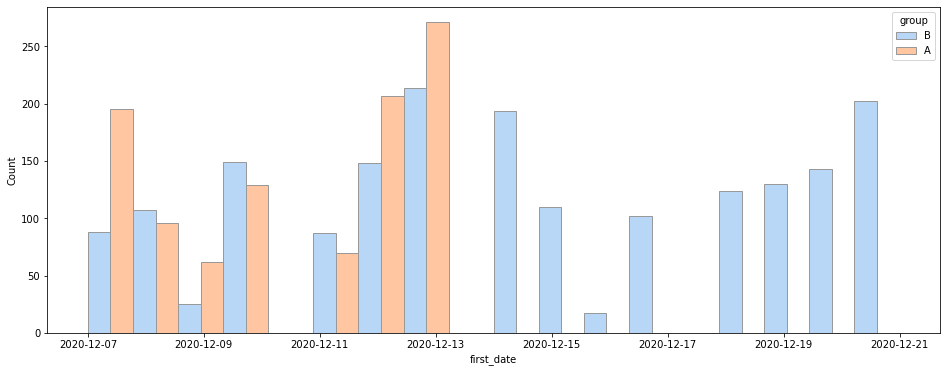

In [110]:
# распределение количества пользователей не совершавших событий по датам
plt.figure(figsize=(16,6))
sns.histplot(users_without_event, x="first_date", hue='group', multiple="dodge", palette="pastel", edgecolor=".6")
plt.show()

После 13 числа все пользователи попавшие в группу А совершали события, а в группе В так и осталась тенденция к присоединению пользователей без событий, отсюда и разница в 800 человек. Что-то произошло 13 декабря.<br>
Посмотри теперь на точно такое же распределение только для пользователей теста которые совершали какие-то события.

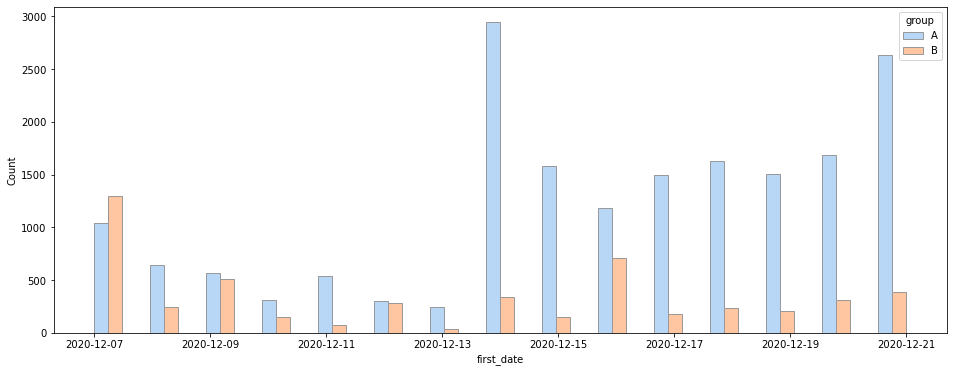

In [111]:
# распределение количества пользователей совершавших события по датам
plt.figure(figsize=(16,6))
sns.histplot(final_df, x="first_date", hue='group', multiple="dodge", palette="pastel", edgecolor=".6")
plt.show()

Как видим из графиков:
- количество пользователей для группы А резко возрасло в тот день, когда пропали пользователи без событий. Можно сделать вывод, что они все просто начали пользоваться продуктом.
- также заметна зависимоть чем меньше пользователей в определенную дату не совершали события тем больше их совершали.
- для группы А пофиксили какую-то проблему начиная с 14 числа, а для группы В нет

Может проблема не совершения событий решилась и для В группы, но для каких-то устройств, проверим это.

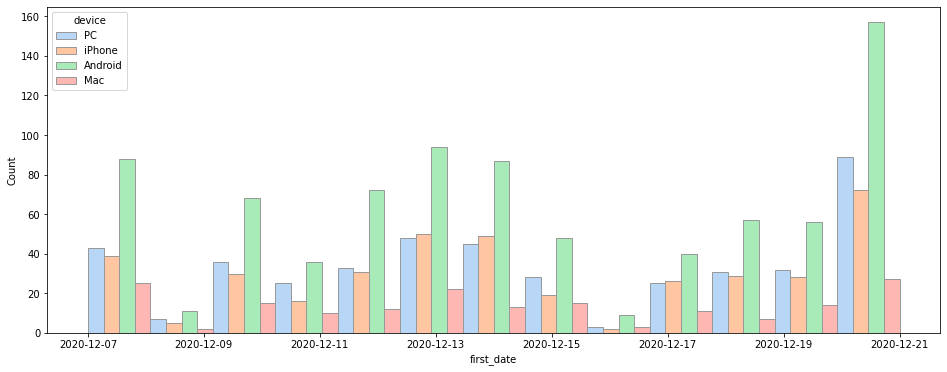

In [112]:
# распределение количества пользователей группы В не совершавших событий по датам разделенных по устройствам
plt.figure(figsize=(16,6))
sns.histplot(users_without_event.loc[users_without_event['group']=='B'], x="first_date", 
             hue='device', multiple="dodge", 
             palette="pastel", edgecolor=".6")
plt.show()

Из распределения видно, что нету связи с каким-либо видом устройства, проблема не в этом.

Пункт ТЗ об увеличении конверсии проверим, после изучения дат маркетинговых компаний и аудитории.

### Время проведения теста

Если время проведения рекламных компаний будут совпадать с временем проведения теста, то это может повлиять на поведение пользователей.

In [113]:
# проверим время проведения маркетинговых компаний
ab_project_marketing_events

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


In [114]:
# маркетинговые компании, которые могут повлиять на тест
ab_project_marketing_events[(ab_project_marketing_events['start_dt']<='2020-01-04') |
                           (ab_project_marketing_events['finish_dt']>='2020-12-07')]

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
10,CIS New Year Gift Lottery,CIS,2020-12-30,2021-01-07


Как видим время проведении компании `Christmas&New Year Promo` совпадает с временем проведения нашего теста начиная от 25 декабря. Чтобы не получить ложные результаты, проверим распределение событий в двух группах в эти числа. Если не будет перекоса в какой-либо из групп, значит данная компания одинаковая влияла на обе группы и нет причин исключать эти события из анализа.<br>
`CIS New Year Gift Lottery` тоже захватывает дни событий из нашего датасета, но эта компания проводится для региона CIS, а у нас пользователи только из EU, поэтому на их действиях это не скажется.

In [115]:
# подсчет количества каждого события для пользователя в разных группах после 25 декабря
event_count_users = (
    final_df.loc[final_df['event_dt']>'2020-12-25']
    .pivot_table(index=['group', 'user_id', 'event_name'],
                values='event_dt', 
                aggfunc='count')
    .reset_index()
)
event_count_users.head()

,group,user_id,event_name,event_dt
0,A,003DF44D7589BBD4,login,1
1,A,003DF44D7589BBD4,product_cart,1
2,A,003DF44D7589BBD4,product_page,1
3,A,00C1F5175586DFCF,login,1
4,A,00C1F5175586DFCF,product_page,1


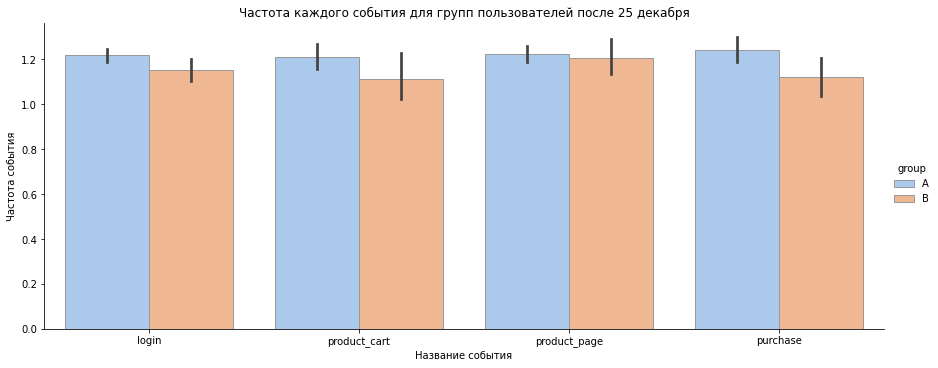

In [116]:
# количество каждого события для пользователей разных групп после 25 декабря
sns.catplot(data=event_count_users, 
            x="event_name", y='event_dt', 
            hue="group", 
            kind='bar', 
            palette="pastel", edgecolor=".6",
            height=5, aspect=2.5)
plt.title('Частота каждого события для групп пользователей после 25 декабря')
plt.xlabel('Название события')
plt.ylabel('Частота события')
plt.show()

Из распределения частоты событий нельзя заключить, что маркетинговая компания повлияла на какую-то из групп больше, чем на другую. Не будем исключать данные по событиям после 25 декабря из дальнейшего анализа. 

### Аудитория

**Пересекающиеся пользователи теста**

Если один и тот же пользователей попадет сразу в две группы это может исказить результаты теста.

In [117]:
# найдем пользователей, которые попали в две группы(A и B) сразу 
group_A_visitor = final_df.loc[final_df['group']=='A', 'user_id']
group_B_visitor = final_df.loc[final_df['group']=='B', 'user_id']

visitor_AB = final_df.loc[
    (final_df['user_id'].isin(group_A_visitor)) & (final_df['user_id'].isin(group_B_visitor))
]

display(visitor_AB.sort_values('user_id').head(10))
print('Количество пересекающихся пользователей -', visitor_AB['user_id'].nunique())

,user_id,event_dt,event_name,details,group,ab_test,first_date,region,device


Количество пересекающихся пользователей - 0


**Пересечение аудитории с конкурирующим тестом**

In [118]:
# названия тестов
final_ab_participants['ab_test'].unique()

array(['recommender_system_test', 'interface_eu_test'], dtype=object)

In [119]:
# подсчет количества пересекающихся между тестами пользователей
test_1_visitor = final_ab_participants.loc[final_ab_participants['ab_test']=='recommender_system_test', 'user_id']
test_2_visitor = final_ab_participants.loc[final_ab_participants['ab_test']=='interface_eu_test', 'user_id']

visitor_12 = final_ab_participants.loc[
    (final_ab_participants['user_id'].isin(test_1_visitor)) & (final_ab_participants['user_id'].isin(test_2_visitor))
]

display(visitor_12.sort_values('user_id').head(10))
print('Количество пересекающихся пользователей -', visitor_12['user_id'].nunique())

,user_id,group,ab_test
17892,001064FEAAB631A1,B,interface_eu_test
235,001064FEAAB631A1,B,recommender_system_test
16961,00341D8401F0F665,A,interface_eu_test
2137,00341D8401F0F665,A,recommender_system_test
8143,003B6786B4FF5B03,A,interface_eu_test
3156,003B6786B4FF5B03,A,recommender_system_test
4768,0082295A41A867B5,A,recommender_system_test
14161,0082295A41A867B5,B,interface_eu_test
15562,00E68F103C66C1F7,B,interface_eu_test
4074,00E68F103C66C1F7,A,recommender_system_test


Количество пересекающихся пользователей - 1602


1602 пользователя участвовали в двух тестах. Данных и ТЗ о втором тесте у нас нет, поэтому мы не можем знать каким образом пересекающиеся пользователи могли(если могли) повлиять на результаты нашего первого теста.<br>
Если пользователи из теста 1 были в группе В теста 2, то это теоретически могло повлиять на результаты теста 1, найдем таких пользователей.

In [120]:
# отфильтруем пользователей из теста 2 группы В
users_test2_B = visitor_12.loc[(visitor_12['ab_test']=='recommender_system_test') & 
               (visitor_12['group']=='B'), 'user_id']
print('количество пользователей теста 2 группы В -', users_test2_B.nunique())
users_test2_B.head()

количество пользователей теста 2 группы В - 681


25    EAFB9027A27D510C
29    5D5E6EE92AF6E9E0
34    C758C53D624AD1AC
35    8C478EE1AE7C98A4
53    952D1EEBF552BC95
Name: user_id, dtype: object

Найден 681 пользователь, удалим тех из них, по которым у нас есть данные в итоговом датасете

In [121]:
print('количество событий до удаления -',len(final_df))
print('количество пользователей до удаления -', final_df['user_id'].nunique())
final_df = final_df.drop(final_df.loc[final_df['user_id'].isin(users_test2_B)].index).reset_index(drop=True)
print('количество событий после удаления -',len(final_df))
print('количество пользователей после удаления -', final_df['user_id'].nunique())

количество событий до удаления - 23420
количество пользователей до удаления - 3481
количество событий после удаления - 22093
количество пользователей после удаления - 3259


В итоге мы избавились еще от порядка 200 пользователей

### Проверка пункта ТЗ про конверсию

In [122]:
# создадим столбец с количеством дней с момента первого события
final_df['lifetime'] = (final_df['event_dt'] - final_df['first_date']).dt.days
print('размер датасета - {}'.format(final_df.shape))
final_df.head()

размер датасета - (22093, 10)


,user_id,event_dt,event_name,details,group,ab_test,first_date,region,device,lifetime
0,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,A,recommender_system_test,2020-12-07,EU,Android,0
1,831887FE7F2D6CBA,2020-12-09 02:19:17,purchase,99.99,A,recommender_system_test,2020-12-07,EU,Android,2
2,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,NaN,A,recommender_system_test,2020-12-07,EU,Android,0
3,831887FE7F2D6CBA,2020-12-08 10:52:27,product_cart,NaN,A,recommender_system_test,2020-12-07,EU,Android,1
4,831887FE7F2D6CBA,2020-12-09 02:19:17,product_cart,NaN,A,recommender_system_test,2020-12-07,EU,Android,2


Помня, что не все пользователи имеют необходимый лайфтайм в 2 недели, проверим частоту событий в зависимости от дня пользвоания приложением

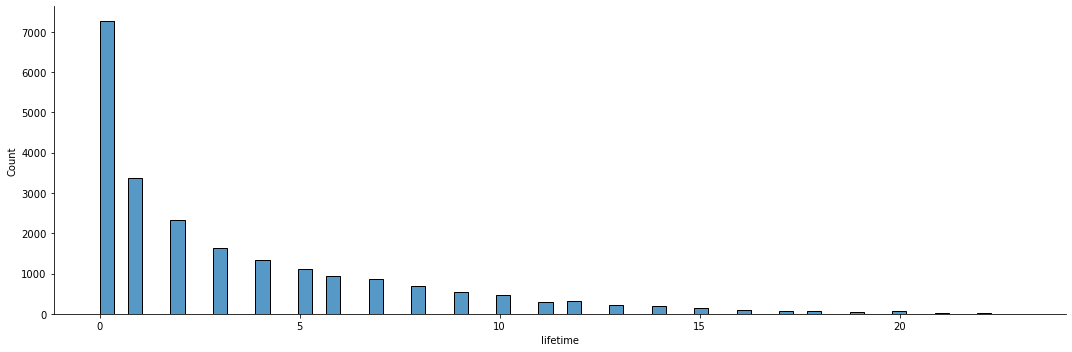

In [123]:
# количество событий распределеннных в зависимости от лайфтайма пользователя
sns.displot(final_df, x="lifetime", 
            multiple="dodge",
            height=5, aspect=3)
plt.show()

Так как в основном все события совершаются в первые дни после регистрации, то не будем удалять пользователей, у которых нет 14 дней участия в тесте, это не повлияет на результаты. Оставим в данных только события пользователей за 14 дней с момента их регистрации.

In [124]:
# отфильтруем датасет по двухнедельному лайфтайму как по ТЗ
final_df = final_df.loc[final_df['lifetime']<=14]
print('размер датасета - {}'.format(final_df.shape))
print('максимальный lifetime - {}'.format(final_df['lifetime'].max()))

размер датасета - (21575, 10)
максимальный lifetime - 14


Отсеилось порядка 500 строк с событиями

In [125]:
# количество уникальных пользователей
final_df.groupby('group')['user_id'].nunique()

group
A    2604
B     655
Name: user_id, dtype: int64

In [126]:
# сводная таблица с количеством пользователей для каждого события двух тестовых групп
final_pivot_event = (
    final_df
    .pivot_table(index='event_name',
                columns='group',
                values='user_id', 
                aggfunc='nunique')
    .reset_index()
)

final_pivot_event

group,event_name,A,B
0,login,2604,654
1,product_cart,782,184
2,product_page,1685,367
3,purchase,833,191


In [127]:
# вычисление конверсии для группы А и В и расчет разницы конверсий группы В относительно А
final_pivot_event['conversion_A'] = (
    round(100 * final_pivot_event['A'] / final_df.loc[final_df['group']=='A']['user_id'].nunique(), 2)
)
final_pivot_event['conversion_B'] = (
    round(100 * final_pivot_event['B'] / final_df.loc[final_df['group']=='B']['user_id'].nunique(), 2)
)

final_pivot_event['difference'] = final_pivot_event['conversion_B'] - final_pivot_event['conversion_A']

final_pivot_event

group,event_name,A,B,conversion_A,conversion_B,difference
0,login,2604,654,100.00,99.85,-0.15
1,product_cart,782,184,30.03,28.09,-1.94
2,product_page,1685,367,64.71,56.03,-8.68
3,purchase,833,191,31.99,29.16,-2.83


In [128]:
# переставим строки в соответствии с воронкой событий
final_pivot_event = final_pivot_event.reindex([0, 2, 1, 3]).reset_index(drop=True)
final_pivot_event

group,event_name,A,B,conversion_A,conversion_B,difference
0,login,2604,654,100.00,99.85,-0.15
1,product_page,1685,367,64.71,56.03,-8.68
2,product_cart,782,184,30.03,28.09,-1.94
3,purchase,833,191,31.99,29.16,-2.83


Отрицательные значения означают, что метрики не только не улучшились на ожидаемые 10%, но и ухудшились.

**Выводы**

- у нас в распоряжении данные по двум А/В тестам: `interface_eu_test` с 11567 пользователями и `recommender_system_test` с 6701 пользователями. В датасет `final_ab_participants_system` записаны только данные пользователей из теста по ТЗ `recommender_system_test`
- после 21 декабря зарегистрировались еще 5000 пользователей, исключили их из датасета
- с 23:36:33 30 декабря и до 4 января событий не происходило, по ТЗ тест должен продолжаться до 4 января
- из Европы в нашем датасете 6351 пользователь, что составляет 15% от общего числа пользователей
- всего уникальных участников 6351, но в нашем распоряжении данные о 3259 пользователе, потому что другие не совершили ни одного события после регистрации. По ТЗ должно быть 6000 участников у нас почти в два раза меньше, нужно понять как это повлияет на конечный результат. Мы можем провести тест, посмотреть на результаты, а после этого оценить мощность теста.
- есть пересекающиеся пользователи между тестами
- есть порядка 3000 пользователей зарегестрировавшихся, но не совершивших после этого ни одного действия. До 13 числа это было характерно для двух групп, после 13 числа только для группы В. Это характерно для пользователей со всех типов устройств.
- конверсия событий для группы В не соответствует заявленному по ТЗ улучшению на 10%. Даже наоборот она стала хуже по сравнению с группой А.

## Исследовательский анализ данных

Удалим из датасета столбцы `ab_test` и `region` они не несут никакой информации в себе, а только увеличивают датасет.

In [129]:
# удаление столбцов
final_df = final_df.drop(['ab_test', 'region'], axis=1)
final_df.head()

,user_id,event_dt,event_name,details,group,first_date,device,lifetime
0,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,A,2020-12-07,Android,0
1,831887FE7F2D6CBA,2020-12-09 02:19:17,purchase,99.99,A,2020-12-07,Android,2
2,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,NaN,A,2020-12-07,Android,0
3,831887FE7F2D6CBA,2020-12-08 10:52:27,product_cart,NaN,A,2020-12-07,Android,1
4,831887FE7F2D6CBA,2020-12-09 02:19:17,product_cart,NaN,A,2020-12-07,Android,2


### Количество событий

In [130]:
# подсчет количества каждого события для пользователя в разных группах
event_count_users = (
    final_df
    .pivot_table(index=['group', 'user_id', 'event_name'],
                values='event_dt', 
                aggfunc='count')
    .reset_index()
)
event_count_users.head()

,group,user_id,event_name,event_dt
0,A,0010A1C096941592,login,4
1,A,0010A1C096941592,product_page,4
2,A,0010A1C096941592,purchase,4
3,A,00341D8401F0F665,login,2
4,A,003DF44D7589BBD4,login,5


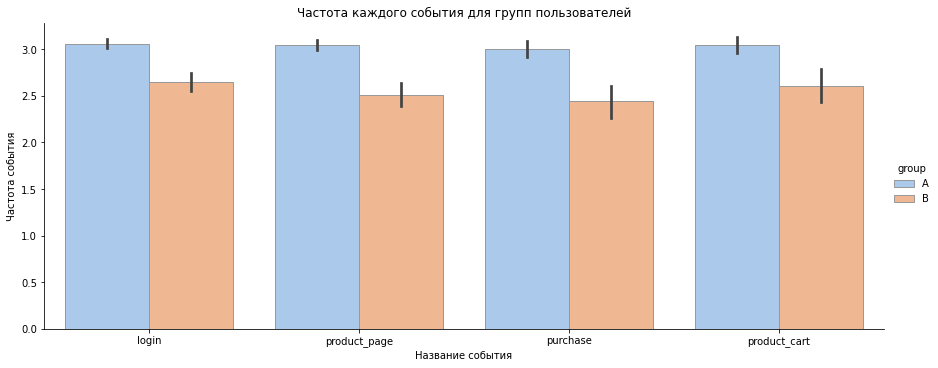

In [131]:
# количество каждого события для пользователей разных групп
sns.catplot(data=event_count_users, x="event_name", y='event_dt', 
            hue="group", 
            kind='bar', 
            palette="pastel", edgecolor=".6",
            height=5, aspect=2.5)
plt.title('Частота каждого события для групп пользователей')
plt.xlabel('Название события')
plt.ylabel('Частота события')
plt.show()

Из графика можно сделать вывод, что в группах А и В пользователи совершают одинаковое количество каждого события

In [132]:
# сводная таблица количества событий на пользователя из разных групп

all_event_count_users = (
    final_df
    .pivot_table(index=['user_id', 'group'],
                values='event_dt', 
                aggfunc='count')
    .reset_index()
)

print(all_event_count_users.shape)
all_event_count_users.head()

(3259, 3)


,user_id,group,event_dt
0,0010A1C096941592,A,12
1,00341D8401F0F665,A,2
2,003DF44D7589BBD4,A,15
3,00505E15A9D81546,A,5
4,005E096DBD379BCF,B,4


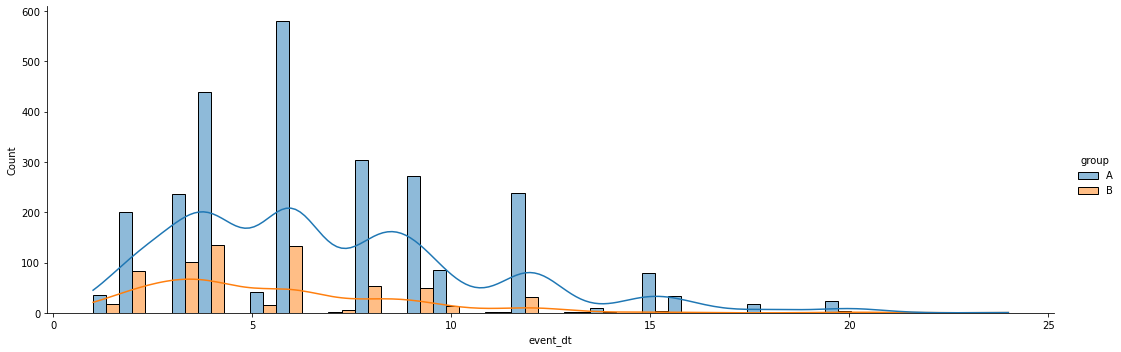

In [133]:
# распределение количества всех событий для пользователей разных групп
sns.displot(all_event_count_users, x="event_dt", hue='group', 
            kde=True, multiple="dodge",
            height=5, aspect=3)
plt.show()

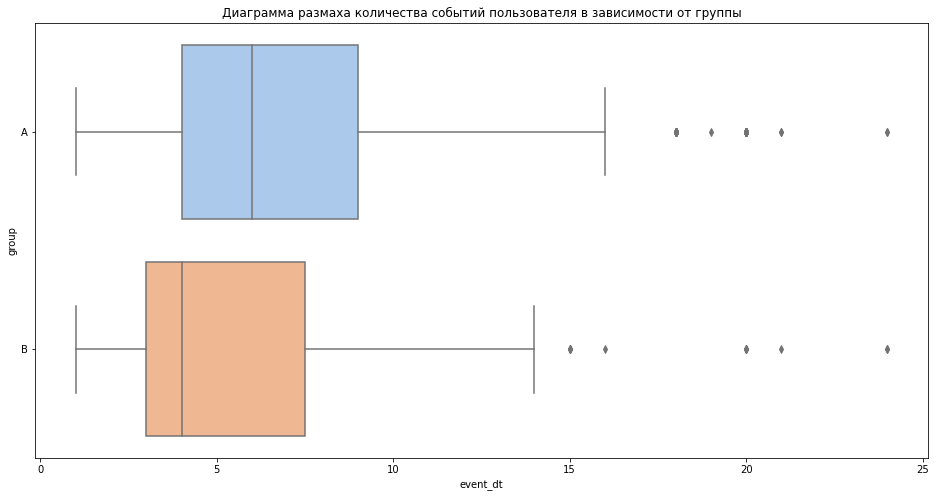

In [134]:
# диаграма размаха всех событий для пользователя
plt.figure(figsize=(16,8))
ax1 = sns.boxplot(
    data=all_event_count_users, x='event_dt', y='group',
    palette='pastel',
    orient='h'
)
plt.title('Диаграмма размаха количества событий пользователя в зависимости от группы')
plt.show()

In [135]:
# числовое описание количества событий для пользователя
all_event_count_users.groupby('group').describe()

event_dt                                            
         count     mean      std  min  25%  50%  75%   max
group                                                     
A       2604.0  6.90361  3.84470  1.0  4.0  6.0  9.0  24.0
B        655.0  5.49313  3.34822  1.0  3.0  4.0  7.5  24.0

Для групп характерно:
- распределение количества событий схоже, за исключением пиков для пользователей из группы А
- для группы А среднее значение количества событий - 6, для группы В - 4

### Распределение событий по дням

Добавим в датасет столбец с днем совершения события 

In [136]:
# добавляем столбец dt
final_df['dt'] = final_df['event_dt'].dt.date
final_df.head()

,user_id,event_dt,event_name,details,group,first_date,device,lifetime,dt
0,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,A,2020-12-07,Android,0,2020-12-07
1,831887FE7F2D6CBA,2020-12-09 02:19:17,purchase,99.99,A,2020-12-07,Android,2,2020-12-09
2,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,NaN,A,2020-12-07,Android,0,2020-12-07
3,831887FE7F2D6CBA,2020-12-08 10:52:27,product_cart,NaN,A,2020-12-07,Android,1,2020-12-08
4,831887FE7F2D6CBA,2020-12-09 02:19:17,product_cart,NaN,A,2020-12-07,Android,2,2020-12-09


In [137]:
# сводная таблица количества событий на пользователя из разных групп
event_count_days = (
    final_df
    .pivot_table(index=['dt', 'group'],
                values='event_name', 
                aggfunc='count')
    .reset_index()
)

print(event_count_days.shape)
event_count_days.head()

(46, 3)


,dt,group,event_name
0,2020-12-07,A,318
1,2020-12-07,B,268
2,2020-12-08,A,313
3,2020-12-08,B,169
4,2020-12-09,A,371


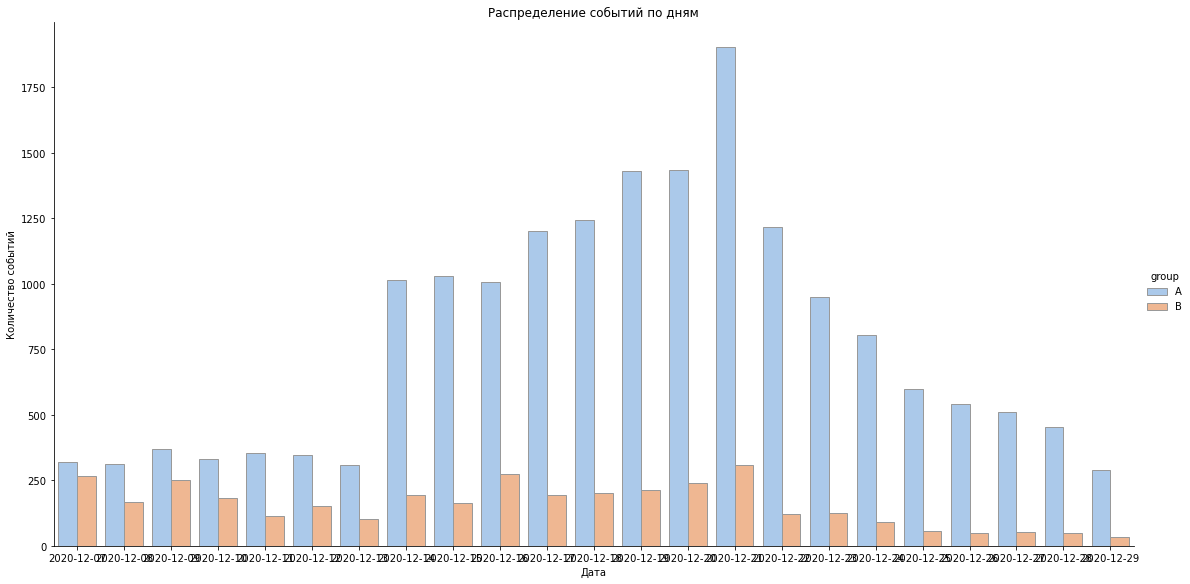

In [138]:
# распределение событий по дням
sns.catplot(x="dt", y='event_name', hue='group', 
            kind="bar", palette="pastel", edgecolor=".6", 
            data=event_count_days, 
            height=8, aspect=2)
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.title('Распределение событий по дням')
plt.show()

Из распределения видно: 
- в первые дни количество событий было одинаковым
- до 13 числа разница в числе событий для групп была не так велика, потом для группы А резко увеличилось количество в 4-5 раз. Как ранее отмечалось это произошло из-за прибавления количества пользоватлей совершающих событие в группу А.
- для группы А после 14 числа пошел резкий рост числа событий с пиком 21 числа
- для группы В события распределены равномерно

Но так как наши группы несбалансированны по количеству участников, посмотрим еще на распределение среднего количества событий в день на пользователя

In [139]:
# сводная таблица количества событий на пользователя из разных групп
event_count_days = (
    final_df
    .pivot_table(index=['dt', 'group','user_id'],
                values='event_name', 
                aggfunc='count')
    .reset_index()
)

print(event_count_days.shape)
event_count_days.head()

(9706, 4)


,dt,group,user_id,event_name
0,2020-12-07,A,021E3EC8A37EE2E3,2
1,2020-12-07,A,06D2B163CB560FAC,2
2,2020-12-07,A,08E17E11A2BD8CF9,3
3,2020-12-07,A,0D8941E6DC625B26,2
4,2020-12-07,A,0EA9AB1C2A159C77,3


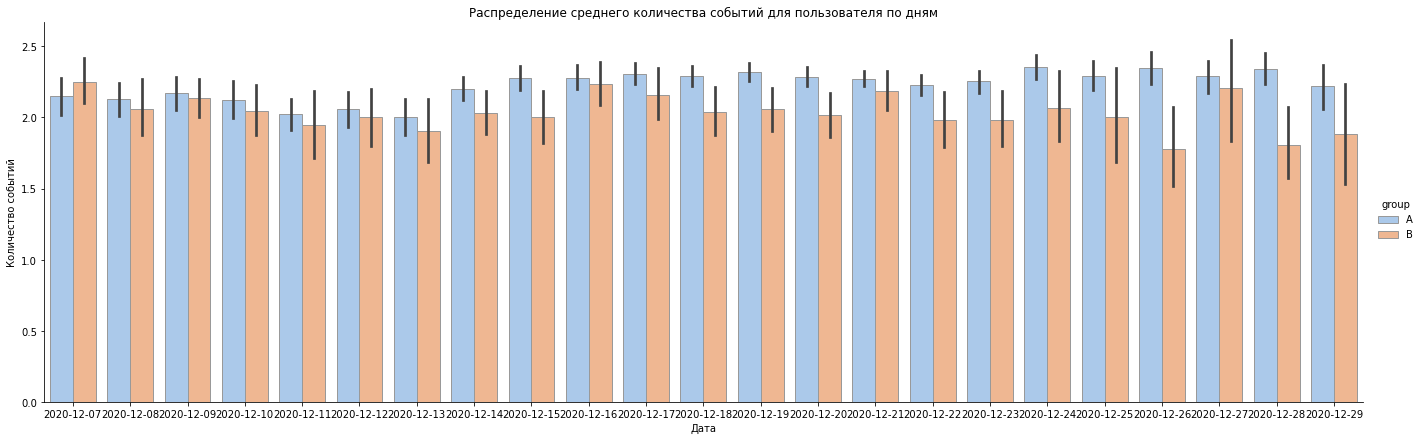

In [140]:
# распределение среднего количества событий для пользователя по дням
sns.catplot(x="dt", y='event_name', hue='group', 
            kind="bar", palette="pastel", edgecolor=".6", 
            data=event_count_days, 
            height=6, aspect=3.2)
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.title('Распределение среднего количества событий для пользователя по дням')
plt.show()

После 13 числа заметна небольшая разница в увеличении событий для пользователя из группы А по сравнению с группой В.

### Конверсия в воронке событий

*События*:
- login - вход в приложение,
- product_page - просмотр карточек товаров,
- product_cart - просмотры корзины,
- purchase - покупки

Построим воронку событий для пользователей из разных групп теста

In [141]:
# воронка событий 

fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'A',
    y = final_pivot_event['event_name'],
    x = final_pivot_event['A'],
    textinfo = "value+percent previous"))

fig.add_trace(go.Funnel(
    name = 'B',
    orientation = "h",
    y = final_pivot_event['event_name'],
    x = final_pivot_event['B'],
    textposition = "inside",
    textinfo = "value+percent previous"))

fig.show()

На графике воронки событий отображено какой процент пользователей проходит на следующий этап.

- Исходя из воронки и количества покупок, можем сделать вывод что у приложения есть функция покупки в один клик, без перехода в корзину. Это объясняет почему на последнем этапе воронки количество пользователей больше чем на предыдущем.
- Больше всего пользователей `теряется на 3 шаге`, то есть после просмотра карточки товара при переходе в корзину товара.
- Конверсия для группы А выше чем для группы В, на всех этапах кроме перехода от просмотра карточки к просмотру корзины(здесь на 3% меньше)
- Конверсия в покупку выше у группы А

### Особенности данных

Нужно учесть:
- количество участников в группах теста сильно отличается
- общее количество участников не соответствует ТЗ 3259 вместо 6000 из-за того, что присутствуют пользователи, которые после регистрации не совершали никаких действий.
- тест был остановлен накануне 31 декабря то есть раньше, чем по ТЗ(4 января) на 5 дней
- присутствуют достаточно много пользователей участвующих в двух тестах одновременно, ТЗ на второй тест мы не знаем и нет возможности полностью установить как это повлияет на наше исследование

## Оценка результатов A/B-тестирования

### Результаты А/B теста

#### Кумулятивные графики

Выделим из датасета пользователей, которые только совершали покупку, чтобы корректо посчитать выручку

In [142]:
# выделим датасета
final_df_purchase = final_df.loc[final_df['event_name']=='purchase']
final_df_purchase.head()

,user_id,event_dt,event_name,details,group,first_date,device,lifetime,dt
0,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,A,2020-12-07,Android,0,2020-12-07
1,831887FE7F2D6CBA,2020-12-09 02:19:17,purchase,99.99,A,2020-12-07,Android,2,2020-12-09
8,3C5DD0288AC4FE23,2020-12-07 19:42:40,purchase,4.99,A,2020-12-07,PC,0,2020-12-07
11,49EA242586C87836,2020-12-07 06:31:24,purchase,99.99,B,2020-12-07,iPhone,0,2020-12-07
12,49EA242586C87836,2020-12-09 15:39:47,purchase,9.99,B,2020-12-07,iPhone,2,2020-12-09


In [143]:
# создадим для удобства датасет с количеством уникальных пользователей в каждый день
visitors = (
    final_df
    .groupby(['dt','group'])
    .agg({'user_id':'nunique'})
    .rename(columns={'user_id':'visitors'})
    .reset_index()
)
visitors.head()

,dt,group,visitors
0,2020-12-07,A,148
1,2020-12-07,B,119
2,2020-12-08,A,147
3,2020-12-08,B,82
4,2020-12-09,A,171


In [144]:
# расчет кумулятивной выручки по группам

# массив уникальных пар значений дат и групп теста
datesGroups = final_df_purchase[['dt', 'group']].drop_duplicates()

# агрегированные кумулятивные по дням данные о покупках
ordersAggregated = datesGroups.apply(
    lambda x: final_df_purchase[
        np.logical_and(
            final_df_purchase['dt'] <= x['dt'], final_df_purchase['group'] == x['group']
        )
    ].agg(
        {
            'dt': 'max',
            'group': 'max',
            'event_dt': 'nunique',
            'user_id': 'nunique',
            'details': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['dt', 'group'])

# агрегированные кумулятивные по дням данные о пользователях
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['dt'] <= x['dt'], visitors['group'] == x['group']
        )
    ].agg({'dt': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['dt', 'group'])

In [145]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['dt', 'group'], right_on=['dt', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'purchases',
    'buyers',
    'revenue',
    'visitors',
]

# датафреймы с кумулятивным количеством покупок и кумулятивной выручкой по дням в группе А и В
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date', 'revenue', 'purchases']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date', 'revenue', 'purchases']]

In [146]:
# проверка полученного датасета с кумулятивными данными
cumulativeData.head()

,date,group,purchases,buyers,revenue,visitors
0,2020-12-07,A,42,43,1104.57,148
1,2020-12-07,B,47,47,639.53,119
2,2020-12-08,A,75,65,1859.24,295
3,2020-12-08,B,71,52,974.29,201
4,2020-12-09,A,122,88,2618.77,466


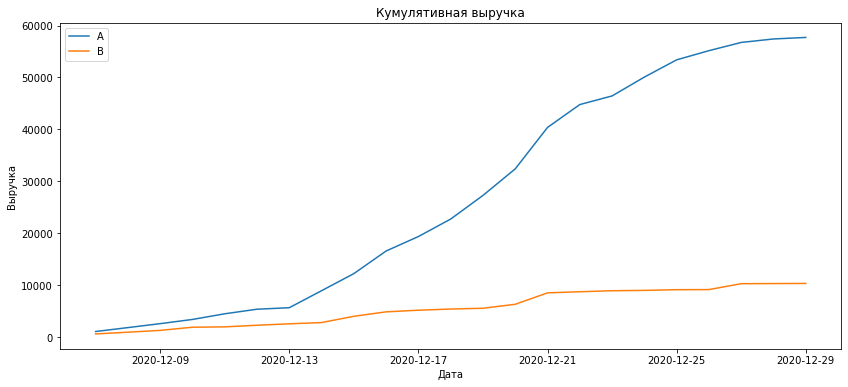

In [147]:
# график кумулятивной выручки по группам
plt.figure(figsize=(14, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.title('Кумулятивная выручка')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.show()

Из графика видно, что до 13 числа выручка в группе А была выше, но ненамного чем в группе В. После 13 числа, за счет добавления большого количества пользователей в группу А и не добавления в группу В, пошел резкий рост выручки в группе А.<br>
Итоговая разница - вырчука группы А примерно в 5 раз выше выручки в группе В.

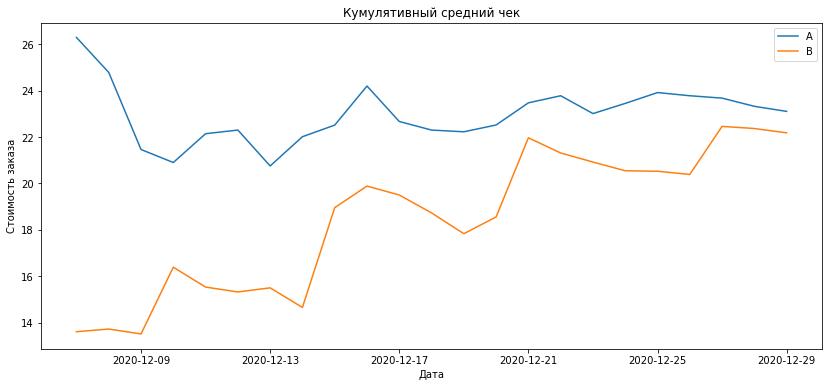

In [148]:
# график кумулятивного среднего чека по группам

plt.figure(figsize=(14, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['purchases'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['purchases'], label='B')
plt.legend()
plt.title('Кумулятивный средний чек')
plt.xlabel('Дата')
plt.ylabel('Стоимость заказа')
plt.show()

На графике среднего чека совсем другая картина:
- Для группы А средний чек за первые дни теста снизился с 26 до 22 долларов, а потом держался на одном уровне до конца теста.
- Для группы В средний чек вырос с 14 до 21-22 долларов за время теста и пока не остановился на этой величине. То есть практически сравнялся с группой А.


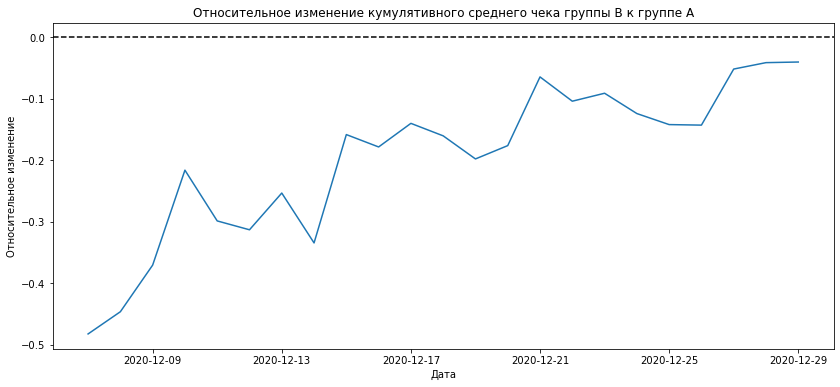

In [149]:
# график относительного изменения кумулятивного среднего чека группы B к группе A

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

# cтроим отношение средних чеков
plt.figure(figsize=(14, 6))
plt.plot(
    mergedCumulativeRevenue['date'], 
    (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['purchasesB'])/
    (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['purchasesA'])-1
)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.show()

По графику видно, как растет средний чек группы В

In [150]:
# кумулятивная конверсия в покукпку по группам

# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['purchases']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

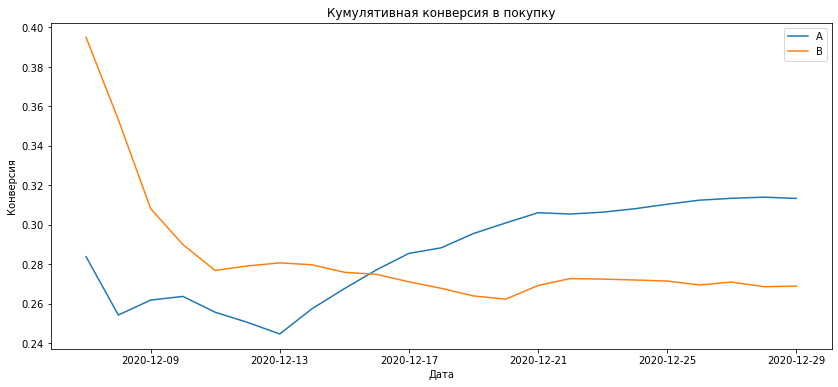

In [151]:
# графики кумулятивной конверсии в покупку по группам

plt.figure(figsize=(14, 6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Кумулятивная конверсия в покупку')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.show()

- Конверсия для группы В изначально была очень сильно выше группы А, но со временем она упала до 0.28 и зафиксировалась в районе этой величины.
- Конверсия для группы А после 13 числа начала расти и дошла до 0.30.
- Конверсия группы В стала хуже чем у группы А после 15 числа.
- Опять же видим влияние резкого увеличения числа пользователей для группы А

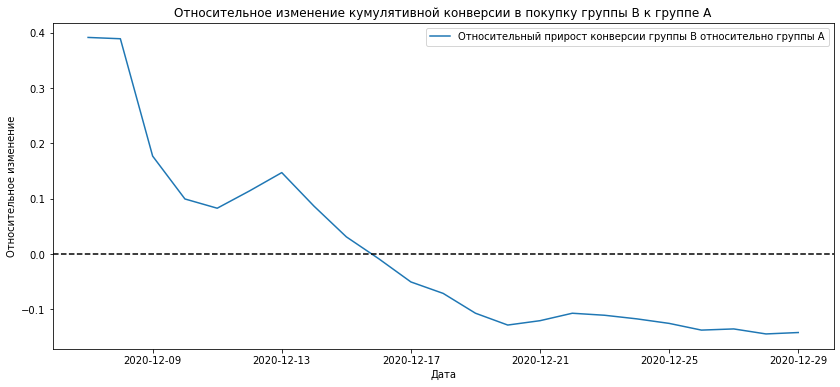

In [152]:
# график относительного изменения кумулятивной конверсии в покупку группы B к группе A

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(14, 6))
plt.plot(
    mergedCumulativeConversions['date'], 
    mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
    label="Относительный прирост конверсии группы B относительно группы A"
)
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивной конверсии в покупку группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.show()

Как видим из графика в начале теста конверсия была лучше у группы В, но она постоянно падала. После 15 числа она стала хежу конверсии В и остановился на определенном уровне начиная с 20 числа.

По этим данным тест можно заканчивать и признать его неудачным, так как группа А предпочтительней. Но теперь нужно проанализировать данные на выбросы, возможно картина измениться.

### Проверка статистической разницы

Чтобы определить, находят ли статистические критерии разницу между группами A и B, проверим гипотезы на равенство долей пользователей совершивших событие.

Напишем для этого функцию для проверки равенства долей событий между группами.<br>

Также с помощью онлайн-калькулятора вычислим показатель мощности событий. То есть вероятность насколько мы уверены в том, что приняли нулевую гипотезу, когда на самом деле верна альтернативная гипотеза.

In [153]:
# определим количество пользователей совершивших события для каждой группы
user_count_event = (
    final_df.groupby(['group','event_name'])
    .agg({'user_id':'nunique'})
    .sort_values(['group','user_id'], ascending=[True, False])
)
user_count_event

user_id
group event_name           
A     login            2604
      product_page     1685
      purchase          833
      product_cart      782
B     login             654
      product_page      367
      purchase          191
      product_cart      184

In [154]:
# количество уникальных пользователей в разных группам A/B теста
user_count = final_df.groupby('group').agg({'user_id':'nunique'})
user_count

,user_id
group,
A,2604
B,655


In [155]:
# функция для проверки равенста долей событий, будет ли отличие между контрольными группами статистически достоверным
def event_equals(successes_value1, successes_value2, trials_value1, trials_value2, alpha):
    alpha = alpha # критический уровень статистической значимости

    successes = np.array([successes_value1, successes_value2])
    trials = np.array([trials_value1, trials_value2])

    # пропорция успехов в первой группе:
    p1 = successes[0]/trials[0]

    # пропорция успехов во второй группе:
    p2 = successes[1]/trials[1]

    # пропорция успехов в комбинированном датасете:
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

    # разница пропорций в датасетах
    difference = p1 - p2 

    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)  

    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(
        p_combined * (1 - p_combined) * (1 / trials[0] + 1 / trials[1])
    )

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-значение: ', p_value)

    if p_value < alpha:
        return print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        return print(
            'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
        ) 

Сформулируем гипотезы

- H0: между долями пользователей для события из разных групп нет значимой разницы.
- H1: между долями пользователей для события из разных групп есть значимая разница.

Уровень значимости установим в 0.05.

In [156]:
# вызов функции для проверки гипотезы равенства долей для события product_page
event_equals(user_count_event.loc[('A','product_page')], 
             user_count_event.loc[('B','product_page')], 
             user_count.loc[('A')], 
             user_count.loc[('B')],
            .05)

p-значение:  [3.94054107e-05]
Отвергаем нулевую гипотезу: между долями есть значимая разница


In [157]:
# вызов функции для проверки гипотезы равенства долей для события purchase
event_equals(user_count_event.loc[('A','purchase')], 
             user_count_event.loc[('B','purchase')], 
             user_count.loc[('A')], 
             user_count.loc[('B')],
            .05)

p-значение:  [0.16326348]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Мощность равна 22% - это означает, что есть очень большая вероятность(78%), что различие между группами на самом деле есть. Просто будем это учитывать.

In [158]:
# вызов функции для проверки гипотезы равенства долей для события product_cart
event_equals(user_count_event.loc[('A','product_cart')], 
             user_count_event.loc[('B','product_cart')], 
             user_count.loc[('A')], 
             user_count.loc[('B')],
            .05)

p-значение:  [0.33135016]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Мощность равна 4% - шансы ошибиться стремятся к 100%

Вывод:
- для событий `purchase` и `product_cart` нет значимой разницы в количестве пользователей между группами теста, но мощность 22% и 4% соотевтственно, что категорически мало

## Выводы

**Основные выводы**

- По ряду пунктов данные не соответствуют ТЗ, а именно:
    - количество участников теста отличается о того, что заявлено в ТЗ, вместо 6000 имеются 3200. Это произошло потому, что есть 3000 пользователей зарегестрировавшихся, но не совершавших никаких действий.
    - тест прекратился раньше установленной даты 30 декабря вместо 4 января
    - пользователи за 14 дней с момента регистрации не показали улучшение конверсий в события на 10%, наоборот наблюдается ухудшение эти показателей
- Участников в группе В сильно меньше чем в группе А, 2600 против 650. Такой перекос произошел в том числе, из-за того что после 13 декабря в группе А перестали присоединяться пользователи, которые не совершали действий. В итоге из 6400 зарегестрировавшихся участников, 3000 не совершали действия и из этих 3000 к группе В принадлежат 1800 человек.
- Кумулятивный средний чек для группы В увеличивался день ко дню. Кумулятивная конверсия у группы В хуже чем у группы А, эти результаты можно признать правдивыми, так как между долями конверсии в покупку нет значимой разницы для разных групп теста.
- Результаты по вычислению конверсии в другие события следующие:
    - для события `product_page` между долями есть значимая разница, результаты нельзя принимать во внимание
    - для события `product_cart` между долями нет значимой разницы, результаты конверсии можно считать достоверными

**Главный вывод** - результаты статистической проверки позволяют нам сказать, что новая рекомендательная система не показала должных изменений и следует признать тест неудачным. Но нужно учитывать мощность статистического теста, что вероятность ошибиться из-за количества пользователей, крайне велика.